In [35]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


Memory Reduction

In [36]:
def reduce_memo(df):
    for col in df.columns:
        if df[col].dtype =="float64":
            df[col]=df[col].astype('float32')

        elif df[col].dtype=='int64':
            df[col]=df[col].astype('int32')       
    return df    

LOAD THE DATA

In [37]:
departments= pd.read_csv("D:\DATASET\departments.csv")
orders=pd.read_csv("D:\DATASET\orders.csv")
order_product=pd.read_csv("D:\DATASET\order_products__prior.csv")
product=pd.read_csv("D:\DATASET\products.csv")
aisle=pd.read_csv("D:\DATASET/aisles.csv")


In [38]:
orders= reduce_memo(orders)
departments=reduce_memo(departments)
order_product=reduce_memo(order_product)
product=reduce_memo(product)
aisle=reduce_memo(aisle)

Look at the Data

In [39]:
aisle

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [40]:
order_product.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


We will join our data into one df

In [41]:
complete_df=pd.merge(order_product,product,how='inner',on='product_id')
complete_df=pd.merge(complete_df,departments,how='inner',on='department_id')
complete_df=pd.merge(complete_df,aisle,how='inner',on='aisle_id')
complete_df=pd.merge(complete_df,orders,how='inner',on='order_id')
complete_df.head()
sample_df=complete_df.sample(200000,random_state=42)

EDA


Look at data

In [43]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int32  
 1   product_id              int32  
 2   add_to_cart_order       int32  
 3   reordered               int32  
 4   product_name            object 
 5   aisle_id                int32  
 6   department_id           int32  
 7   department              object 
 8   aisle                   object 
 9   user_id                 int32  
 10  eval_set                object 
 11  order_number            int32  
 12  order_dow               int32  
 13  order_hour_of_day       int32  
 14  days_since_prior_order  float32
dtypes: float32(1), int32(10), object(4)
memory usage: 2.3+ GB


Summary of Data

In [44]:
complete_df.describe()

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.035642e+07
mean,1.710749e+06,2.557634e+04,8.351076e+00,5.896975e-01,7.121430e+01,9.921906e+00,1.029372e+05,1.714205e+01,2.738818e+00,1.342498e+01,1.110406e+01
std,9.873007e+05,1.409669e+04,7.126671e+00,4.918886e-01,3.820302e+01,6.281156e+00,5.946648e+04,1.753504e+01,2.090049e+00,4.246365e+00,8.377106e+00
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.559430e+05,1.353000e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,5.142100e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00
50%,1.711048e+06,2.525600e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,1.026110e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00
75%,2.565514e+06,3.793500e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.543910e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01


Distrubution of days since prior order

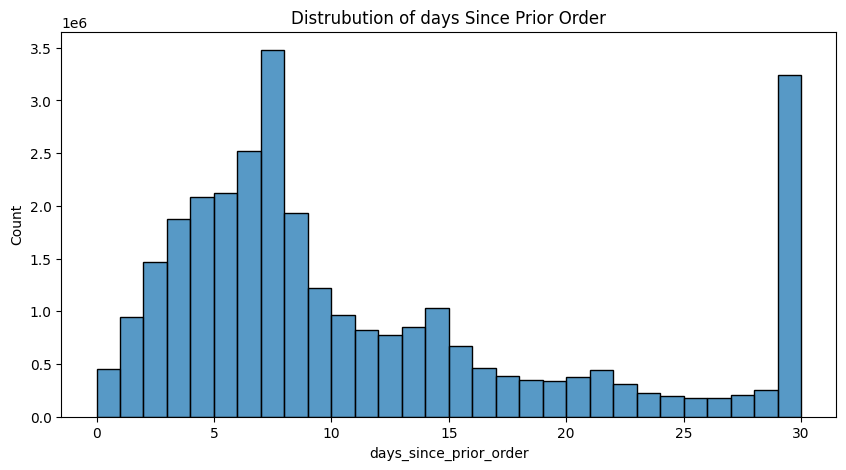

In [45]:
plt.figure(figsize=(10,5))
sns.histplot(complete_df['days_since_prior_order'],bins=30)
plt.title("Distrubution of days Since Prior Order")
plt.show()

Top 30 Product Orderd

Text(0.5, 1.0, 'Top 30 Product Ordred')

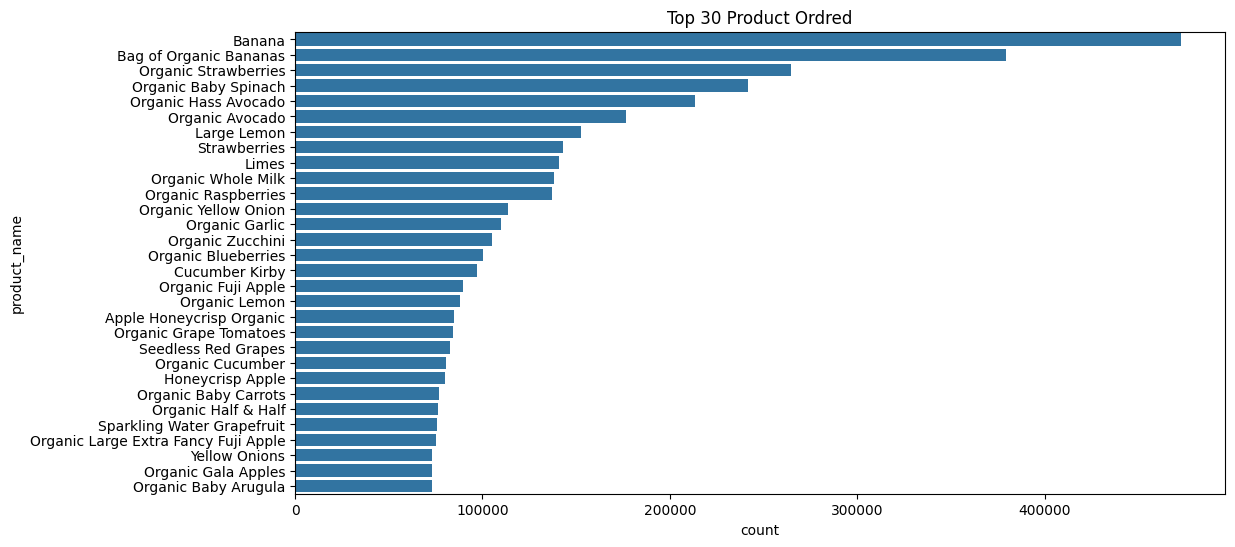

In [46]:
most_ordered=complete_df['product_name'].value_counts().head(30)
plt.figure(figsize=(12,6))
sns.barplot(x=most_ordered,y=most_ordered.index)
plt.title("Top 30 Product Ordred")

Day Of Week Plot

<Axes: xlabel='order_dow', ylabel='Count'>

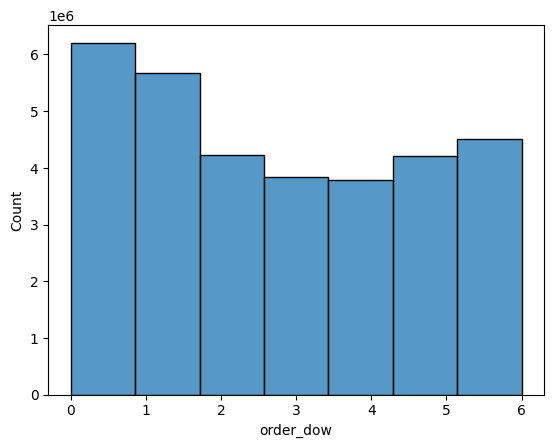

In [47]:
sns.histplot(complete_df['order_dow'],bins=7,kde=False)

Order Per department

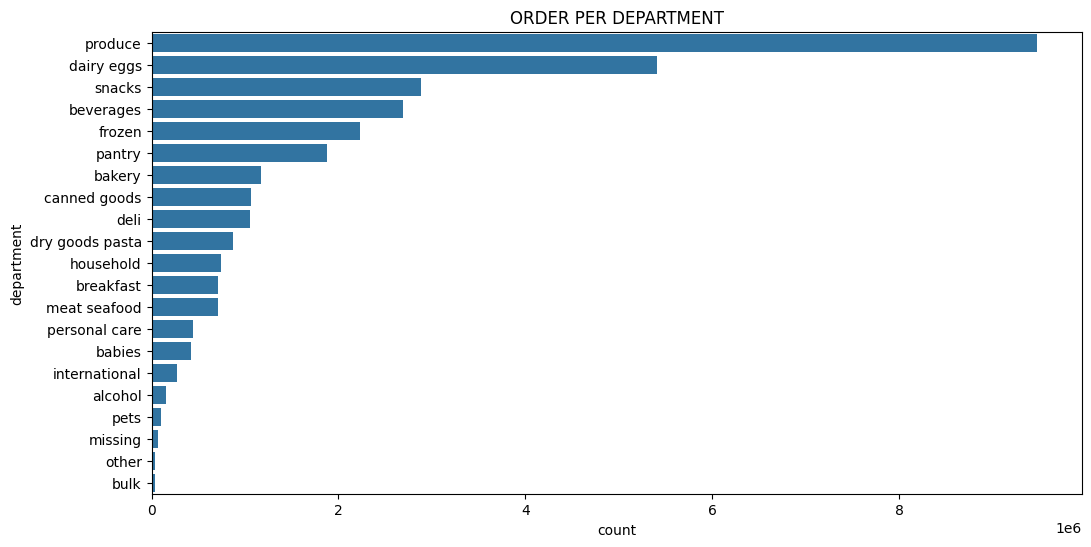

In [48]:
top_departments=complete_df['department'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=top_departments,y=top_departments.index)
plt.title("ORDER PER DEPARTMENT")
plt.show()

Number of orders per users

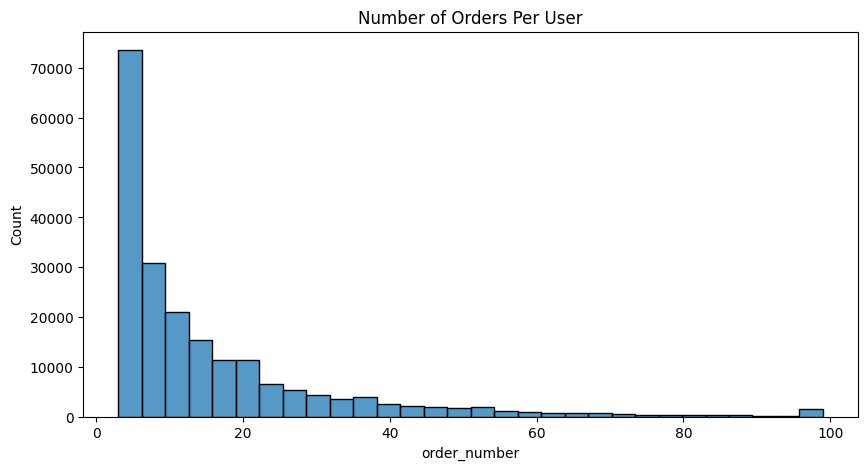

In [49]:
user_order=complete_df.groupby('user_id')['order_number'].max()
plt.figure(figsize=(10,5))
sns.histplot(user_order,bins=30)
plt.title("Number of Orders Per User")
plt.show()

Reorderd Vs orderd


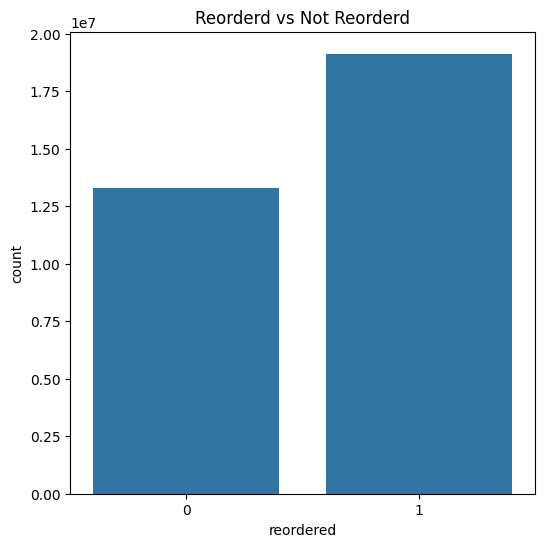

In [50]:
plt.figure(figsize=(6,6))
sns.countplot(x=complete_df['reordered'])
plt.title("Reorderd vs Not Reorderd")
plt.show()

The Top 20 aisle

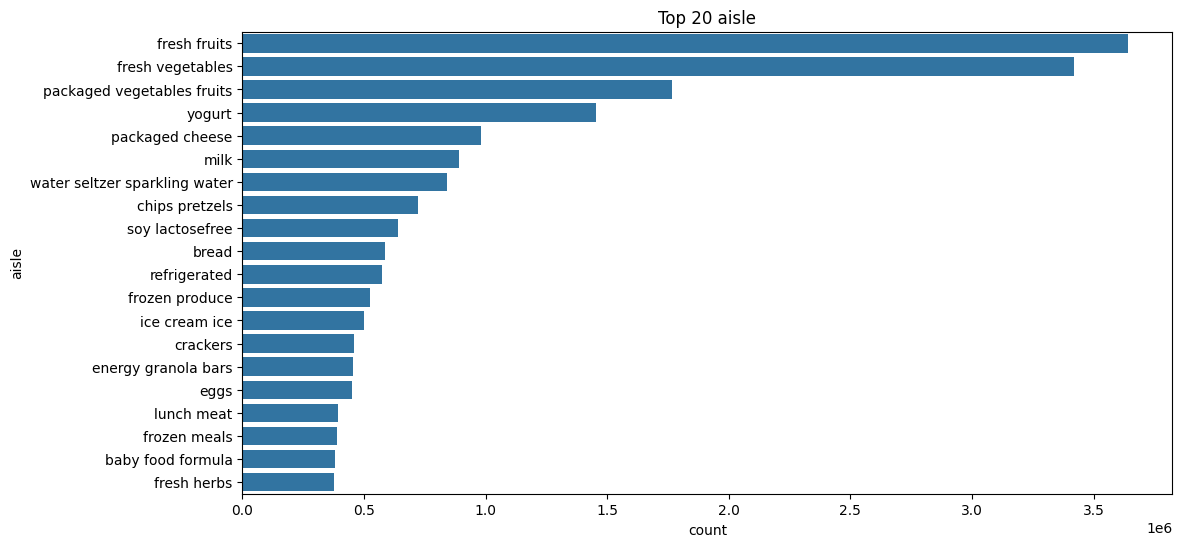

In [51]:
top_aisle=complete_df['aisle'].value_counts().head(20)
plt.figure(figsize=(12,6))
sns.barplot(x=top_aisle,y=top_aisle.index)
plt.title("Top 20 aisle")
plt.show()

REorder VS Order number

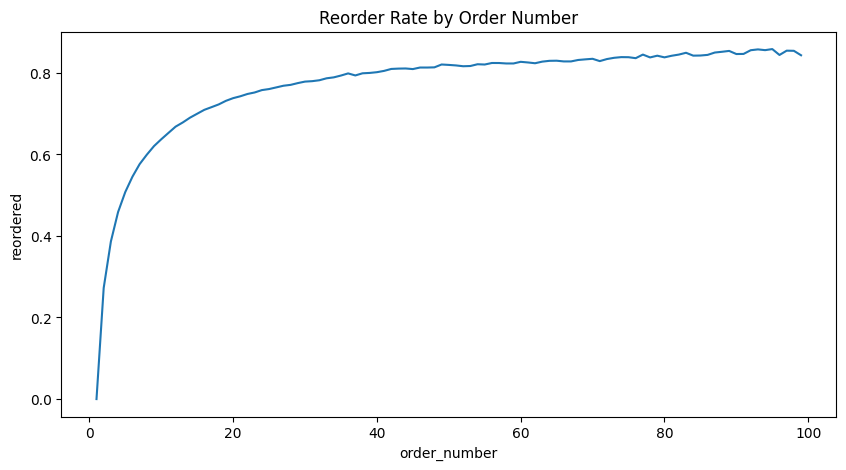

In [ ]:
order_ordernum=complete_df.groupby('order_number')['reordered'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=order_ordernum,x='order_number',y='reordered')
plt.title("Reorder Rate VS Order Number")
plt.show()

Handle Numrical Features

In [53]:
num_cols=complete_df.select_dtypes(include=['int32','float32','int64','float64']).columns
num_cols

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'aisle_id',
       'department_id', 'user_id', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')

Handle Categorical Features

In [54]:
cat_cols=complete_df.select_dtypes(include=['object']).columns

Correlation For Numrical Featuers

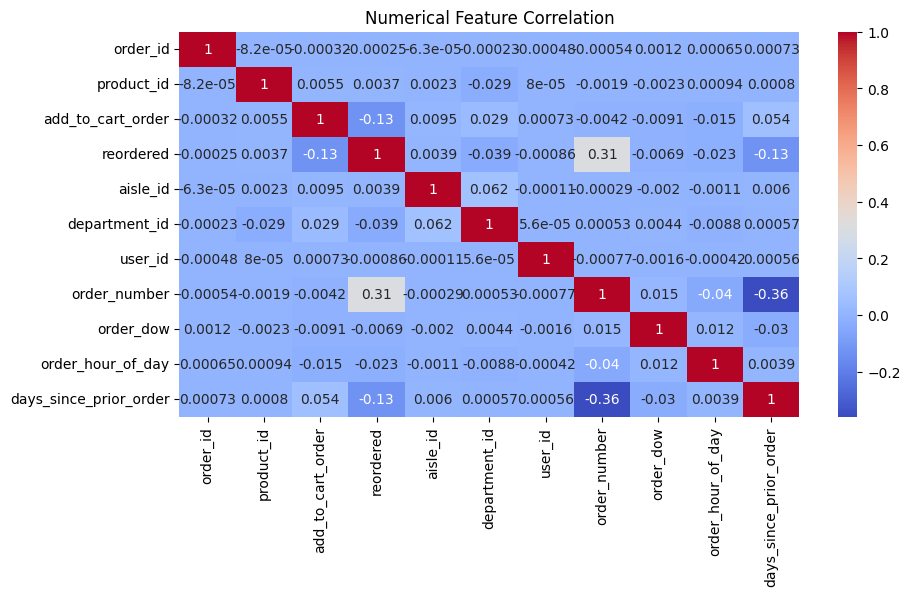

In [55]:
plt.figure(figsize=(10,5))
sns.heatmap(complete_df[num_cols].corr(),annot=True,cmap='coolwarm')
plt.title("Numerical Feature Correlation")
plt.show()

Time Of Day plot

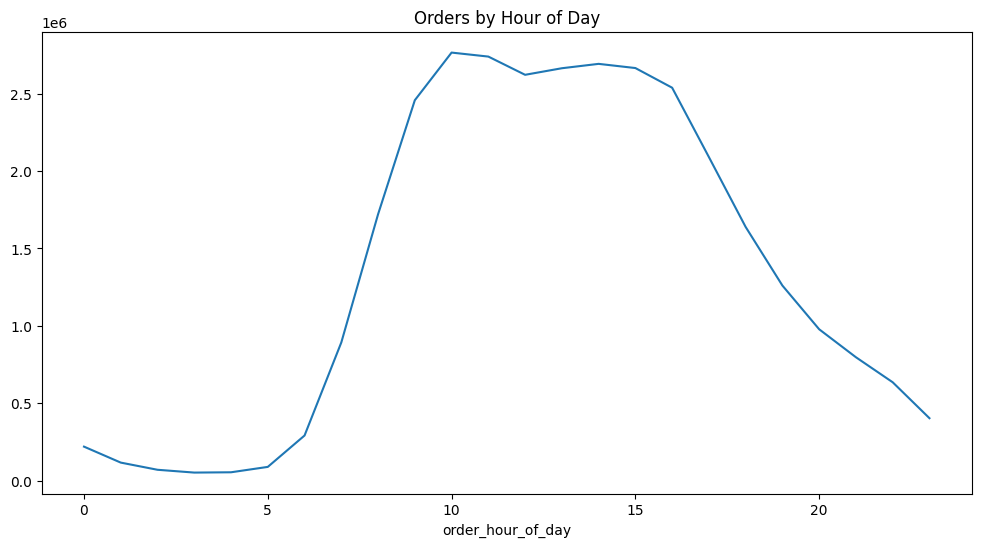

In [58]:
whole_day=complete_df['order_hour_of_day'].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.lineplot(x=whole_day.index,y=whole_day.values)
plt.title("Orders by Hour of Day")
plt.show()


Orders in the Whole Week

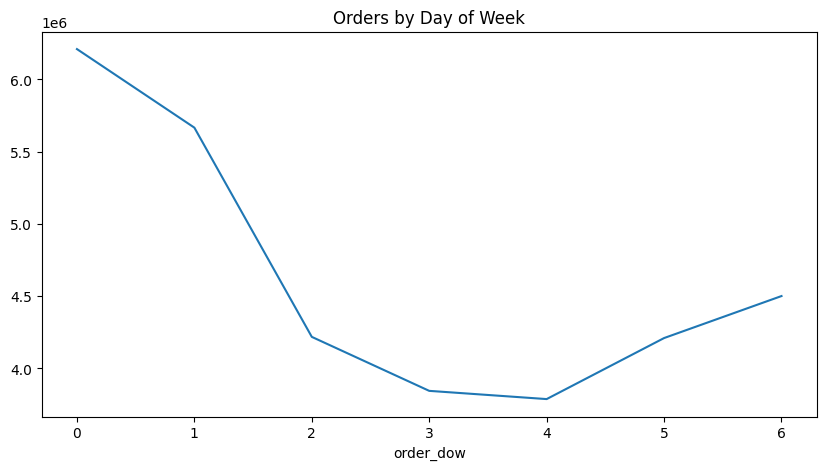

In [59]:
whole_week=complete_df['order_dow'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.lineplot(x=whole_week.index,y=whole_week.values)
plt.title("Orders by Day of Week")
plt.show()

HANDLE MISSING VALUE

In [56]:
missing_value= complete_df.isnull().sum()
missing_value

order_id                        0
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                    0
aisle_id                        0
department_id                   0
department                      0
aisle                           0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
dtype: int64

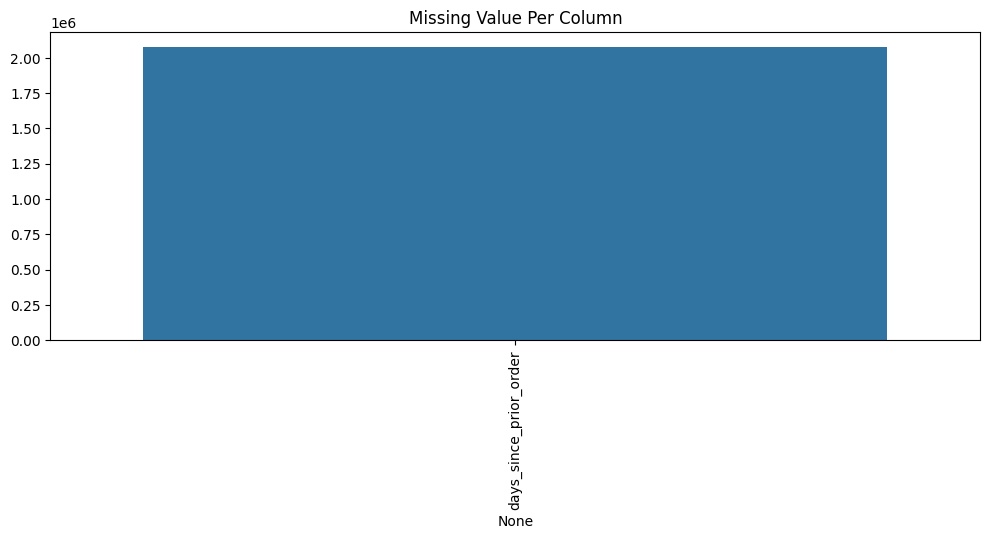

In [57]:
missing_count=complete_df.isnull().sum()
missing_count=missing_count[missing_count>0].sort_values(ascending=False)
plt.figure(figsize=(12,4))
sns.barplot(x=missing_count.index,y=missing_count.values)
plt.xticks(rotation=90)
plt.title("Missing Value Per Column")
plt.show()

In [1]:
print ("..")

..
